<a href="https://colab.research.google.com/github/samuelrodriguesi/topicos_especiais_4/blob/main/Atividade_3_Samuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

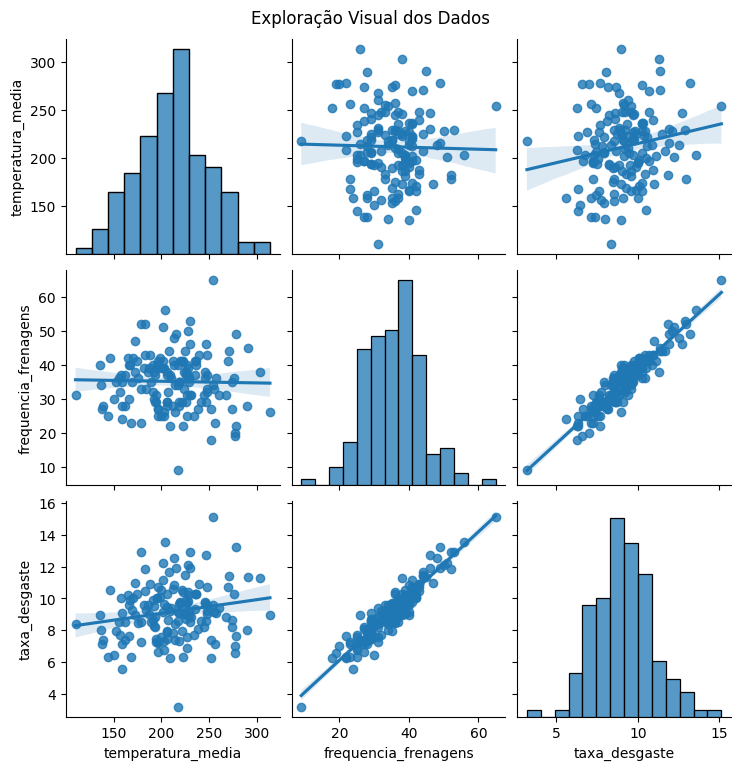

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Geração dos dados
np.random.seed(42)
n = 150
temperatura_media = np.random.normal(loc=215, scale=40, size=n)
frequencia_frenagens = np.random.normal(loc=35, scale=8, size=n).astype(int)

taxa_desgaste = (0.01 * temperatura_media) + (0.2 * frequencia_frenagens) + np.random.normal(0, 0.5, n)

df = pd.DataFrame({
    'temperatura_media': temperatura_media,
    'frequencia_frenagens': frequencia_frenagens,
    'taxa_desgaste': taxa_desgaste
})

sns.pairplot(df, kind='reg')
plt.suptitle('Exploração Visual dos Dados', y=1.02)
plt.show()


In [2]:
X = df[['temperatura_media', 'frequencia_frenagens']]
y = df['taxa_desgaste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# Construção da rede neural
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(8, activation='relu'),
    Dense(1)  # Saída única para regressão
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Treinamento
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Predições
y_pred_nn = model.predict(X_test_scaled).flatten()

# Métricas
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("🔍 Avaliação da Rede Neural:")
print(f'R²: {r2_nn:.2f}')
print(f'MAE: {mae_nn:.3f} mm/1000 km')
print(f'RMSE: {rmse_nn:.3f} mm/1000 km')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
🔍 Avaliação da Rede Neural:
R²: 0.08
MAE: 1.187 mm/1000 km
RMSE: 1.343 mm/1000 km


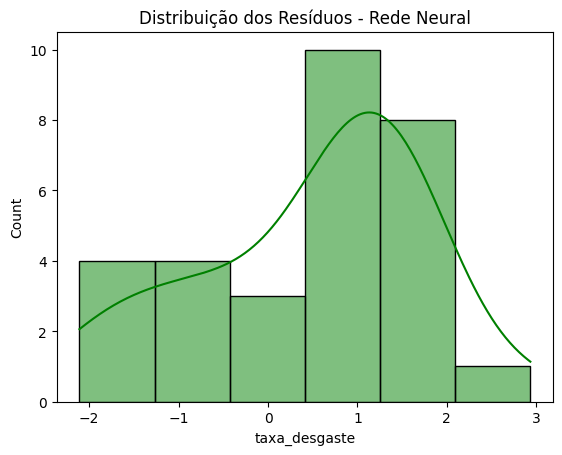

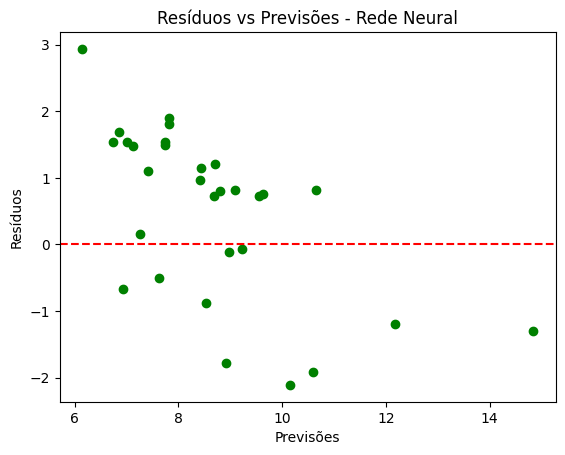

In [5]:
# Comparação de resíduos
residuos_nn = y_test - y_pred_nn

sns.histplot(residuos_nn, kde=True, color='green')
plt.title("Distribuição dos Resíduos - Rede Neural")
plt.show()

plt.scatter(y_pred_nn, residuos_nn, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Previsões - Rede Neural")
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression

modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("📏 Regressão Linear:")
print(f'R²: {r2_lr:.2f}')
print(f'MAE: {mae_lr:.3f} mm/1000 km')
print(f'RMSE: {rmse_lr:.3f} mm/1000 km')


📏 Regressão Linear:
R²: 0.89
MAE: 0.355 mm/1000 km
RMSE: 0.463 mm/1000 km
